## Cylinder contributions
Formulas from the paper
> Yakovlev, I. Contribution of $n$-cylinder square-tiled surfaces to Masur–Veech volume of $\mathcal{H}(2g-2)$.
> Geom. Funct. Anal. 33, 1682–1716 (2023).

In [1]:
from iyakovlev import cyl_contrib_min_stratum_list, tree_coefficients_dict

In [2]:
cyl_contrib_min_stratum_list?

Signature:      cyl_contrib_min_stratum_list(gmax)
Docstring:     
   Return the list of lists of a_{g,n} for 1<=g<=gmax, 1<=n<=g, where

      a_{g,n} = Vol_n(2g-2) / ( 2*(2*pi)^(2g) / (2g-1)! )

   is the normalized contribution of n-cylinder square-tiled surfaces
   to the Masur-Veech volume of the minimal stratum H(2g-2)

   EXAMPLES: sage: cyl_contrib_min_stratum_list(3) [[1/24], [1/1440,
   1/1152], [1/7560, 1/3840, 11/82944]]
Init docstring: Initialize self.  See help(type(self)) for accurate signature.
File:           ~/sage_projects/iyakovlev/cyl_contrib_min_stratum.py
Type:           function

In [3]:
cyl_contrib_min_stratum_list(5)

[[1/24],
 [1/1440, 1/1152],
 [1/7560, 1/3840, 11/82944],
 [1/13440, 5197/29030400, 3/20480, 335/7962624],
 [1/11880, 661/2903040, 53929/232243200, 1447/13271040, 2161/106168320]]

## Let's look at the distribution of the number of cylinders in big genus

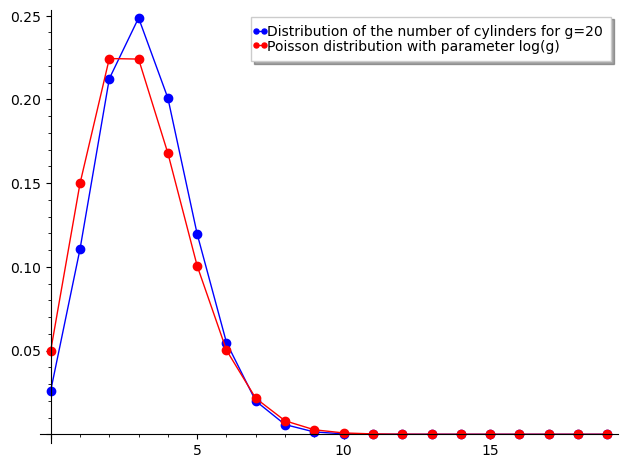

In [6]:
g=20
sum_contrib = sum(cyl_contrib_min_stratum_list(g)[-1])
pl1 = list_plot([i/sum_contrib for i in cyl_contrib_min_stratum_list(g)[-1]],plotjoined=True, marker='o', legend_label='Distribution of the number of cylinders for g=20')
lmbda = log(g)
pl2 = list_plot([(k, exp(-lmbda)* lmbda**k/factorial(k) ) for k in range(g)], color='red', plotjoined=True, marker='o', legend_label='Poisson distribution with parameter log(g)')
pl = pl1+pl2
pl.legend(True)
pl.show()

## Tree coefficients
(Theorem 2.4 of the same paper)

In [7]:
tree_coefficients_dict(6)

{[2]: 1,
 [3]: 1,
 [4]: 2,
 [2, 2]: 1,
 [5]: 6,
 [3, 2]: 4,
 [6]: 24,
 [4, 2]: 18,
 [3, 3]: 20,
 [2, 2, 2]: 11}

In [11]:
%%time
s=32
t=tree_coefficients_dict(s)

CPU times: user 4.02 s, sys: 28.1 ms, total: 4.04 s
Wall time: 4.04 s


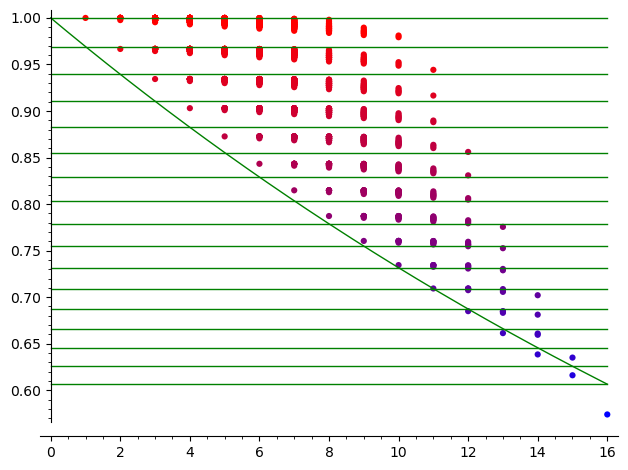

In [13]:
# distribution of the tree coefficients normalized by (s-2)!
# the bluer the color, the more 2's in the partition
pl1 = sum(list_plot([(len(p),t[p]/factorial(s-2)) for p in Partitions(s,min_part=2) if sum(1 if j==2 else 0 for j in p)==i], 
              #color = (1,0,0) if i%2==0 else (0,0,1), size=20)
              color=(1 - i/(s/2), 0, i/(s/2)), size=20) 
          for i in range(0,s//2+1))
pl1+= plot(exp(-x/s),0,s//2, color='green') + sum(plot(exp(-i/s),0,s//2, color='green') for i in range(0,s//2+1) )
pl1

## Difference of contributions to spin subspaces
See chapter 4 of my PhD thesis
> Ivan Yakovlev. Metric ribbon graphs. Université de Bordeaux, 2024.

In [14]:
from iyakovlev import cyl_contrib_min_stratum_spin_diff_list
cyl_contrib_min_stratum_spin_diff_list?

Signature:      cyl_contrib_min_stratum_spin_diff_list(gmax)
Docstring:     
   Return the list of lists of d_{g,n} for 1<=g<=gmax, 1<=n<=g, where

      d_{g,n} = Vol^{diff}_n(2g-2) / ( 2*(2*pi)^(2g) / (2g-1)! )

   is the difference of the normalized contributions of n-cylinder
   square-tiled surfaces to the Masur-Veech volume of even and odd
   subspaces of the minimal stratum H(2g-2)

   EXAMPLES: sage: cyl_contrib_min_stratum_spin_diff_list(3) [[1/24],
   [-1/1440, -1/1152], [1/10080, 1/11520, 5/82944]]
Init docstring: Initialize self.  See help(type(self)) for accurate signature.
File:           ~/sage_projects/iyakovlev/cyl_contrib_min_stratum.py
Type:           function

In [15]:
cyl_contrib_min_stratum_spin_diff_list(5)

[[1/24],
 [-1/1440, -1/1152],
 [1/10080, 1/11520, 5/82944],
 [-1/26880, -221/9676800, -7/552960, -49/7962624],
 [1/38016, 23/1935360, 121/25804800, 1/491520, 1/1310720]]